## <font color = red>Whitney Brannen- Homework 2


# <font color = blue> Q2 (40 points)
### Write your own class in Python to perform PCA analysis. Require that your input data follow the format where rows are samples and columns are variables. Your function should do the following:

- Do mean-centering.

- Compute the covariance matrix using numpy.cov().

- Perform eigen-decomposition using numpy.linalg.eig().

- Project the data onto the principal component axes.

- Return the variance and percent variance that each PC explains, all of the scores, and loadings.




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
class myPCA:
    
    def __init__(self, data):
        # make class take pandas or numpy array
        if isinstance(data, pd.DataFrame):
            self.data = data.to_numpy()
        elif isinstance(data, np.ndarray):
            self.data = data
        else:
            pass
        self.n_components = self.data.shape[1]   
        self.mean_val = None
        self.mc = None # X matrix, mean centered data
        self.cov = None
        self.eigenvalues = None # for scree plot
        self.eigenvectors = None # p matrix
        self.scores = None # y matrix
        self.var = None
    
    def __repr__(self):
        return np.array_str(self.data)
    
    def mean(self):
        self.mean_val = np.mean(self.data,axis=0, keepdims=True)
        return self.mean_val
    
    def mean_centered(self):
        if self.mean_val is None:
            self.mean() 
            
        self.mc = np.real(self.data - self.mean_val)

        return self.mc
    
    # p matrix
    def covariance_matrix(self):
        if self.mc is None:
            self.mean_centered()
            
        self.cov = np.cov(self.mc, rowvar=False) # rowvar False means rows are samples and columns are variables
        return self.cov
    
    def eigendecomposition(self):
        if self.cov is None:
            self.covariance_matrix()
        
        self.eigenvalues,self.eigenvectors = np.linalg.eig(self.cov)

        sorted_indices = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[sorted_indices].tolist()
        self.eigenvectors = self.eigenvectors[:, sorted_indices]
        
    def variance_explained(self):
        if self.eigenvalues is None:
            self.eigendecomposition()
            
        var_total = sum(self.eigenvalues)
        self.var = []
        for x in self.eigenvalues:
            var = x/var_total
            self.var.append(var)
        self.var = np.real(self.var)
        return self.var 
    
    def project_data(self):
         # y matrix/ scores
        if self.eigenvectors is None:
            self.eigendecomposition()
        
        self.scores = np.real(np.dot(self.mc, self.eigenvectors))
        return self.scores
    
    def loading_plot(self):  
        x_values = np.real(self.eigenvectors[:,0])
        y_values = np.real(self.eigenvectors[:,1])
        plt.scatter(x_values,y_values,c='blue')
        plt.title("Loading Plot")
        plt.xlabel(f"PC1: {round(self.var[0]*100,2)}%")
        plt.ylabel(f"PC2: {round(self.var[1]*100,2)}%")
        return plt
    
    def scree_plot(self):
        plt.plot(np.real(self.eigenvalues), marker="o", linewidth=0,markerfacecolor='blue')
        plt.title('Scree Plot') 
        plt.xlabel('Principal Component')
        plt.ylabel('Eigenvalue')
        return plt
    
    def scores_plot(self):
        pca_df = self.transform()
        x1 = pca_df[:,0]
        x2 = pca_df[:,1]
        l,d = np.shape(pca_df)
        ll = int(l//2) # dimensions
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.scatter(x1[:ll], x2[:ll], color = "blue")
        ax.scatter(x1[ll:], x2[ll:], color = "red")
        ax.set_title("Scores Plot")
        ax.set_xlabel(f"PC1: {round(self.var[0]*100,2)}%")
        ax.set_ylabel(f"PC2: {round(self.var[1]*100,2)}%")
        return 
    
    def fit(self):
        # return learned p matrix/ loadings
        self.mean_centered()
        self.covariance_matrix()
        self.eigendecomposition()
        self.variance_explained()
        return f"PCA fit: n_components={self.n_components}"
    
    def transform(self):
        # return scores (y=xp)
        self.project_data()
        return self.scores
    
    def fit_transform(self):
        self.fit()
        return self.transform()
    

# <font color = blue>Q3 (20 points)

### Apply your own PCA function to the dataset “Homework 2 dataset prob3.csv”. In this dataset, columns correspond to variables.

- Plot the scores plot.

- Do you see a clear separation of the raw data?

- Can you still separate them after you project your raw data onto your first principal component?

- What message can you get from this observation?

- What is the variance of the projections on PC1 and PC2. What is the relationship between these variances and the eigenvalues of your covariance matrix?

In [5]:
q3 = pd.read_csv("Homework_2_dataset_prob3.csv")
data3 = myPCA(q3)
data3.fit_transform() # scores matrix

array([[ 22.98125567,  -1.37554593],
       [ 22.49894927,  -2.28970193],
       [ 20.005713  ,  -1.36361068],
       [ 19.25038654,  -2.02791987],
       [ 17.43671516,  -1.72371377],
       [ 15.7347048 ,  -1.52169118],
       [ 13.81334629,  -1.11893815],
       [ 12.92246342,  -1.65919662],
       [ 11.67612091,  -1.87416596],
       [  9.20147893,  -0.96509075],
       [  8.66382649,  -1.82859835],
       [  6.12162538,  -0.85769827],
       [  5.65215179,  -1.78359786],
       [  6.22197684,  -3.66058307],
       [  1.47693189,  -0.67381093],
       [  1.65972922,  -2.19661835],
       [  1.39460442,  -3.30952212],
       [ -0.97476546,  -2.4967838 ],
       [ -3.36938661,  -1.66093746],
       [ -4.08672549,  -2.36000994],
       [ -7.05572945,  -0.99853296],
       [ -6.55487496,  -2.81240164],
       [ -7.89657768,  -2.9401047 ],
       [ -9.95393323,  -2.41289772],
       [-12.20501147,  -1.70841075],
       [-13.03194198,  -2.30719345],
       [-12.68705447,  -3.97833325],
 

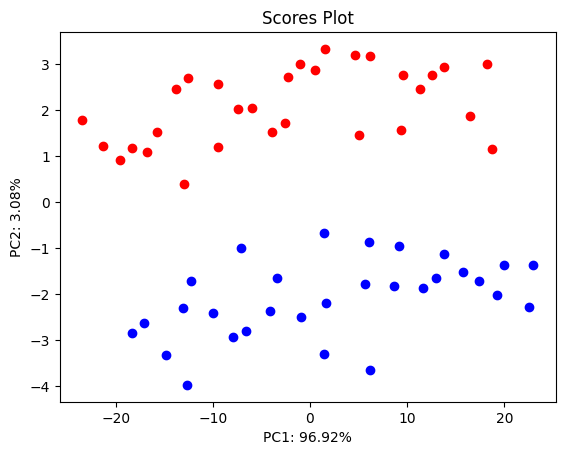

In [6]:
# scores plot
data3.scores_plot()

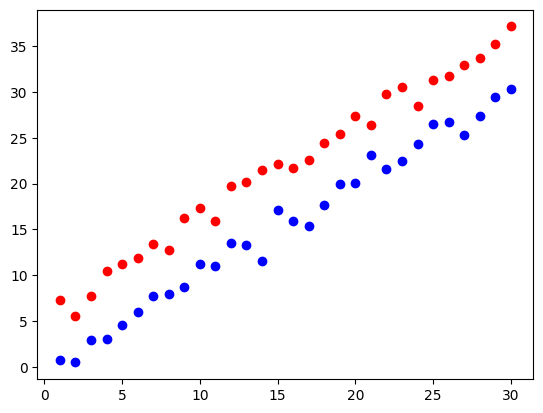

In [7]:
# Raw data

q33 = q3.to_numpy()
x1 = q33[:,0]
x2 = q33[:,1]
l,d = np.shape(q33)
ll = int(l//2)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x1[:ll], x2[:ll], color = "blue")

ax.scatter(x1[ll:], x2[ll:], color = "red")


## <font color = red> Yes, there is clear separation of the raw data, as well as separation when projected onto the first principal component seen in the scores plot.  From these observations, we can get a message that there is a linear correlation between the two data sets.

In [8]:
data3.variance_explained()

array([0.96915564, 0.03084436])

In [9]:
data3.covariance_matrix()

array([[76.18644068, 77.65206707],
       [77.65206707, 89.97956704]])

## <font color = red> The variance explained by the projects on PC1 and PC2 can be seen on the scores plot, as well as by .variance_explained(), being 96.9% explained by PC1 and 3.1% explained by PC2.  The relationship between these and the covariance matrix is that the variance explained values are the eigenvalues for the covariance matrix when it is diagonalized

# <font color = blue>Q4 (20 points)
### Apply your own PCA function to the dataset “Homework 2 dataset prob4.csv”. In this dataset, rows correspond to different variables and columns correspond to different samples. You will need to transpose it before PCA analysis because your own PCA function requires columns to be variables. Plot the scree plot for PC1 and PC2 and indicate the percentage of variance that PC1 and PC2 explains respectively. Also plot the scores plot and loadings plot.

In [10]:
q4 = pd.read_csv("Homework_2_dataset_prob4.csv",index_col=0)# index col 0 for formatting when transposed
q4transposed = q4.T # transpose for columns as variables
data4 = myPCA(q4transposed)

In [11]:
data4.fit_transform()

array([[ 1.01542992e+07, -2.31838943e+06, -2.73400695e+06, ...,
        -1.01863407e-10, -1.01863407e-10, -1.21690391e-09],
       [ 2.97144812e+07, -5.94512352e+05,  4.36059705e+06, ...,
        -2.27009878e-09, -2.27009878e-09,  9.08039510e-09],
       [-1.14458427e+07, -6.33668418e+06, -1.03673037e+06, ...,
         6.98491931e-10,  6.98491931e-10,  3.37604433e-09],
       ...,
       [-3.26083303e+06, -9.31233583e+06,  7.77253892e+06, ...,
         2.03726813e-10,  2.03726813e-10,  2.27009878e-09],
       [-5.82909061e+06,  1.44498615e+07,  2.05243648e+05, ...,
        -1.10594556e-09, -1.10594556e-09,  3.87080945e-09],
       [-6.38222408e+06,  6.88680155e+06,  5.76689293e+06, ...,
        -8.73114914e-10, -8.73114914e-10,  1.57160684e-09]])

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

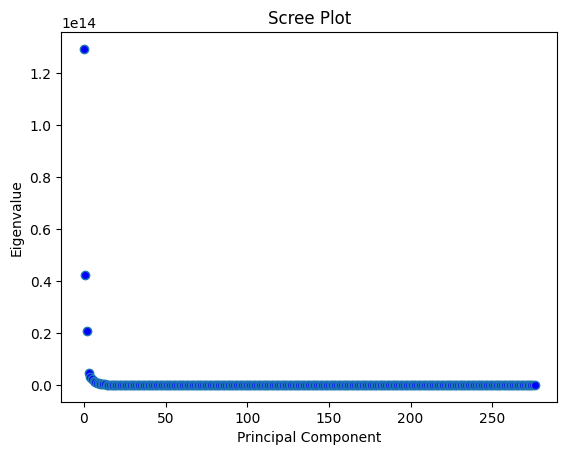

In [12]:
data4.scree_plot()

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

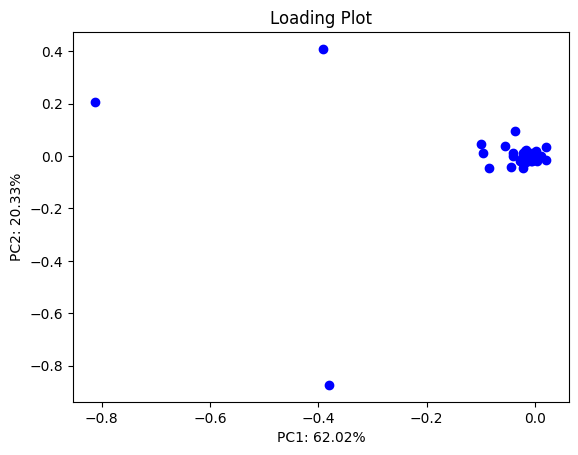

In [13]:
data4.loading_plot()

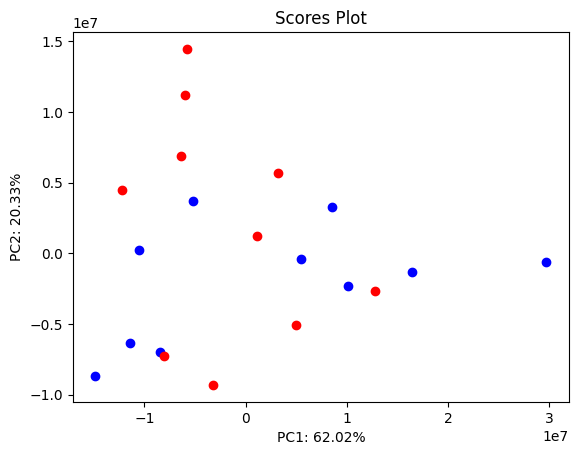

In [14]:
data4.scores_plot()

# Checking against sklearn 

### <font color = red>When checking against sklearn, my scores matrix/ plots look the same for both datasets q3 and q4

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
result = pca.fit_transform(q3)
result

array([[-22.98125567,   1.37554593],
       [-22.49894927,   2.28970193],
       [-20.005713  ,   1.36361068],
       [-19.25038654,   2.02791987],
       [-17.43671516,   1.72371377],
       [-15.7347048 ,   1.52169118],
       [-13.81334629,   1.11893815],
       [-12.92246342,   1.65919662],
       [-11.67612091,   1.87416596],
       [ -9.20147893,   0.96509075],
       [ -8.66382649,   1.82859835],
       [ -6.12162538,   0.85769827],
       [ -5.65215179,   1.78359786],
       [ -6.22197684,   3.66058307],
       [ -1.47693189,   0.67381093],
       [ -1.65972922,   2.19661835],
       [ -1.39460442,   3.30952212],
       [  0.97476546,   2.4967838 ],
       [  3.36938661,   1.66093746],
       [  4.08672549,   2.36000994],
       [  7.05572945,   0.99853296],
       [  6.55487496,   2.81240164],
       [  7.89657768,   2.9401047 ],
       [  9.95393323,   2.41289772],
       [ 12.20501147,   1.70841075],
       [ 13.03194198,   2.30719345],
       [ 12.68705447,   3.97833325],
 

In [17]:
pca_df = pd.DataFrame(data=result, columns=["PC1", "PC2"])
pca_df

,PC1,PC2
0,-22.981256,1.375546
1,-22.498949,2.289702
2,-20.005713,1.363611
3,-19.250387,2.027920
4,-17.436715,1.723714
5,-15.734705,1.521691
6,-13.813346,1.118938
7,-12.922463,1.659197
8,-11.676121,1.874166
9,-9.201479,0.965091


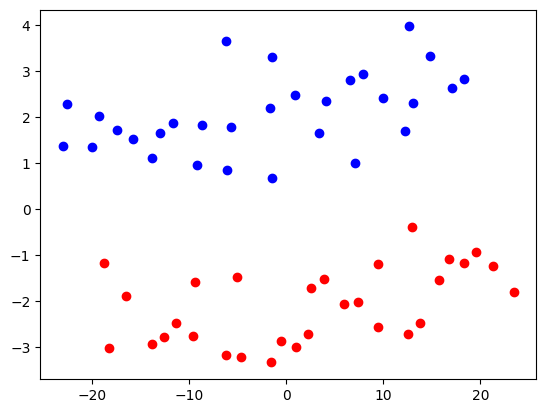

In [18]:
# plot scores
pca_df1 = pca_df.to_numpy()
x1 = pca_df1[:,0]
x2 = pca_df1[:,1]
l,d = np.shape(pca_df1)
ll = int(l//2)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x1[:ll], x2[:ll], color = "blue")

ax.scatter(x1[ll:], x2[ll:], color = "red")

In [19]:
result = pca.fit_transform(q4transposed)
result

array([[ 10154299.19495273,  -2318389.43153255],
       [ 29714481.21755498,   -594512.35209682],
       [-11445842.69198015,  -6336684.18130054],
       [ 16399866.83555755,  -1347229.88848427],
       [ -5173875.45783377,   3665144.81849459],
       [-10529013.60202042,    209660.82974202],
       [-14846207.12263094,  -8666399.50395208],
       [ -8484464.69394063,  -7005646.33185513],
       [  5492156.09800403,   -426430.92469838],
       [  8539894.87259484,   3251055.79887865],
       [  3236108.44623403,   5662106.27088457],
       [ 12753524.47077584,  -2699832.86369685],
       [  4943040.14891184,  -5098214.72893413],
       [ -6033510.83392174,  11213976.16615436],
       [ -8092366.66193137,  -7271727.42743041],
       [-12258360.92532622,   4488235.75377254],
       [  1102418.42933451,   1250560.79937652],
       [ -3260833.03255208,  -9312335.82566504],
       [ -5829090.6080157 ,  14449861.47088103],
       [ -6382224.08376735,   6886801.55146192]])

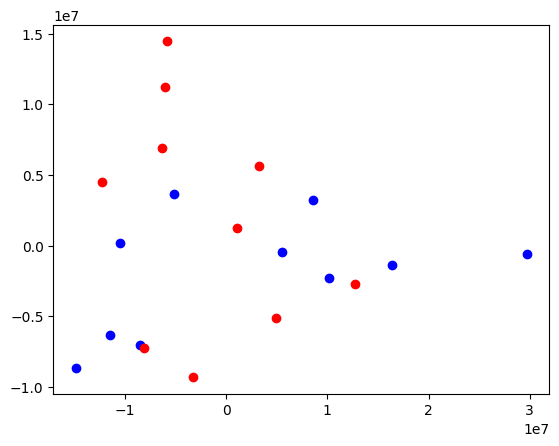

In [20]:
pca_df = pd.DataFrame(data=result, columns=["PC1", "PC2"])

# plot scores
pca_df1 = pca_df.to_numpy()
x1 = pca_df1[:,0]
x2 = pca_df1[:,1]
l,d = np.shape(pca_df1)
ll = int(l//2)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x1[:ll], x2[:ll], color = "blue")

ax.scatter(x1[ll:], x2[ll:], color = "red")